In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import io
import numpy as np
import time # Import the time module

@Snap data

In [2]:
def download_and_read_data():
    """
    Download and read data from the Facebook social network (from SNAP).

    This function downloads the dataset from the provided URL (a compressed text file containing
    the Facebook social network data) and reads it into a Pandas DataFrame. The data consists of
    edges (source and target nodes), which represent connections between users in the Facebook network.
    The DataFrame will have two columns: 'source' and 'target'.

    Returns:
        pandas.DataFrame: A DataFrame containing the edges of the Facebook social network, with columns 'source' and 'target'.

    """
    url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"
    response = urllib.request.urlopen(url)
    data = response.read()

    df = pd.read_csv(io.BytesIO(data),
                     compression='gzip',
                     sep=" ",
                     names=["source", "target"])
    return df


In [3]:
def calculate_all_metrics(G):
    """
    Calculate all graph metrics for a given graph.

    Args:
        G (networkx.Graph): The graph object from the NetworkX library. It represents a network with nodes and edges.

    Returns:
        dict: A dictionary containing various graph metrics, including:
            - 'nodes': The number of nodes in the graph (|V|)
            - 'edges': The number of edges in the graph (|E|)
            - 'density': The density of the graph
            - 'average_degree': The average degree of nodes
            - 'avg_degree': The average degree of nodes (calculated from node degrees)
            - 'max_degree': The maximum degree of any node
            - 'degrees': A dictionary of nodes with their corresponding degrees
            - 'degree_centrality': A dictionary with the degree centrality values, maximum degree centrality, average degree centrality, and the node with the maximum degree centrality
            - 'betweenness_centrality': A dictionary with betweenness centrality values, maximum betweenness centrality, average betweenness centrality, and the node with the maximum betweenness centrality
            - 'closeness_centrality': A dictionary with closeness centrality values, maximum closeness centrality, average closeness centrality, and the node with the maximum closeness centrality
            - 'pagerank': A dictionary with PageRank values, maximum PageRank, average PageRank, and the node with the maximum PageRank

    """
    metrics = {}

    # 1. Basic Information
    metrics['nodes'] = G.number_of_nodes()  # |V|: The number of nodes in the graph
    metrics['edges'] = G.number_of_edges()  # |E|: The number of edges in the graph
    metrics['density'] = nx.density(G)  # The density of the graph

    # 2. Degree Metrics
    metrics['average_degree'] = np.mean([d for n, d in G.degree()])

    degrees = dict(G.degree())
    metrics['avg_degree'] = sum(degrees.values()) / len(degrees)  # The average degree of nodes
    metrics['max_degree'] = max(degrees.values())  # The maximum degree of any node
    metrics['degrees'] = degrees  # A dictionary of nodes with their corresponding degrees

    # 3. Degree Centrality
    dc = nx.degree_centrality(G)
    metrics['degree_centrality'] = {
        'values': dc,
        'max': max(dc.values()),
        'avg': sum(dc.values()) / len(dc),
        'node_max': max(dc, key=dc.get)
    }

    # 4. Betweenness Centrality
    bc = nx.betweenness_centrality(G)
    metrics['betweenness_centrality'] = {
        'values': bc,
        'max': max(bc.values()),
        'avg': sum(bc.values()) / len(bc),
        'node_max': max(bc, key=bc.get)
    }

    # 5. Closeness Centrality
    cc = nx.closeness_centrality(G)
    metrics['closeness_centrality'] = {
        'values': cc,
        'max': max(cc.values()),
        'avg': sum(cc.values()) / len(cc),
        'node_max': max(cc, key=cc.get)
    }

    # 6. PageRank
    pr = nx.pagerank(G, alpha=0.85)
    metrics['pagerank'] = {
        'values': pr,
        'max': max(pr.values()),
        'avg': sum(pr.values()) / len(pr),
        'node_max': max(pr, key=pr.get)
    }

    return metrics


In [4]:
def print_detailed_results(metrics):
    """
    Print detailed results of graph metrics analysis.

    This function prints out the detailed analysis of various graph metrics, including basic
    information such as the number of nodes, edges, density, and average degree, as well as centrality measures
    like Degree Centrality, Betweenness Centrality, Closeness Centrality, and PageRank.

    Args:
        metrics (dict): A dictionary containing graph metrics (as returned by `calculate_all_metrics`).
                        The dictionary should contain the following keys:
                        - 'nodes', 'edges', 'density', 'average_degree', 'max_degree', etc.
                        - Centrality measures: 'degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'pagerank'.

    """
    print("\n======== SOCIAL NETWORK ANALYSIS ========= ")
    print("1. Basic Information")
    print(f"- Number of nodes (users): {metrics['nodes']}")
    print(f"- Number of edges (connections): {metrics['edges']}")
    print(f"- Density: {metrics['density']}")
    print(f"- Average degree: {metrics['average_degree']}")
    print(f"- Maximum degree: {metrics['max_degree']}")

    centrality_measures = {
        'Degree Centrality': 'degree_centrality',
        'Betweenness Centrality': 'betweenness_centrality',
        'Closeness Centrality': 'closeness_centrality',
        'PageRank': 'pagerank'
    }

    print("2. Centrality Measures")
    for name, measure in centrality_measures.items():
        print(f"- {name}")
        print(f"- Maximum value: {metrics[measure]['max']:.4f}")
        print(f"- Average value: {metrics[measure]['avg']:.4f}")
        print(f"- Node with the highest value: {metrics[measure]['node_max']}")


In [5]:
def plot_metrics(metrics):
    """
    Plot histograms of various graph metrics.

    This function takes the metrics of a graph and plots histograms for different graph properties
    such as degree, degree centrality, betweenness centrality, closeness centrality, and PageRank.
    Each metric is plotted on a separate subplot.

    Args:
        metrics (dict): A dictionary containing graph metrics (as returned by `calculate_all_metrics`).
                        The dictionary should contain the following keys:
                        - 'degrees': A dictionary with node degrees.
                        - 'degree_centrality': Degree centrality values.
                        - 'betweenness_centrality': Betweenness centrality values.
                        - 'closeness_centrality': Closeness centrality values.
                        - 'pagerank': PageRank values.

    """
    # Create subplots for displaying histograms of different metrics
    fig, axs = plt.subplots(2, 3, figsize=(10, 8))
    metrics_list = ['degrees', 'degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'pagerank']
    titles = ['Degree', 'Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'PageRank']

    for i, metric in enumerate(metrics_list):
        ax = axs[i//3, i%3]
        # Get values for the metric to plot
        values = metrics[metric]['values'] if metric != 'degrees' else metrics['degrees']
        ax.hist(list(values.values()), bins=50, color='skyblue', edgecolor='black')
        ax.set_title(titles[i])
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


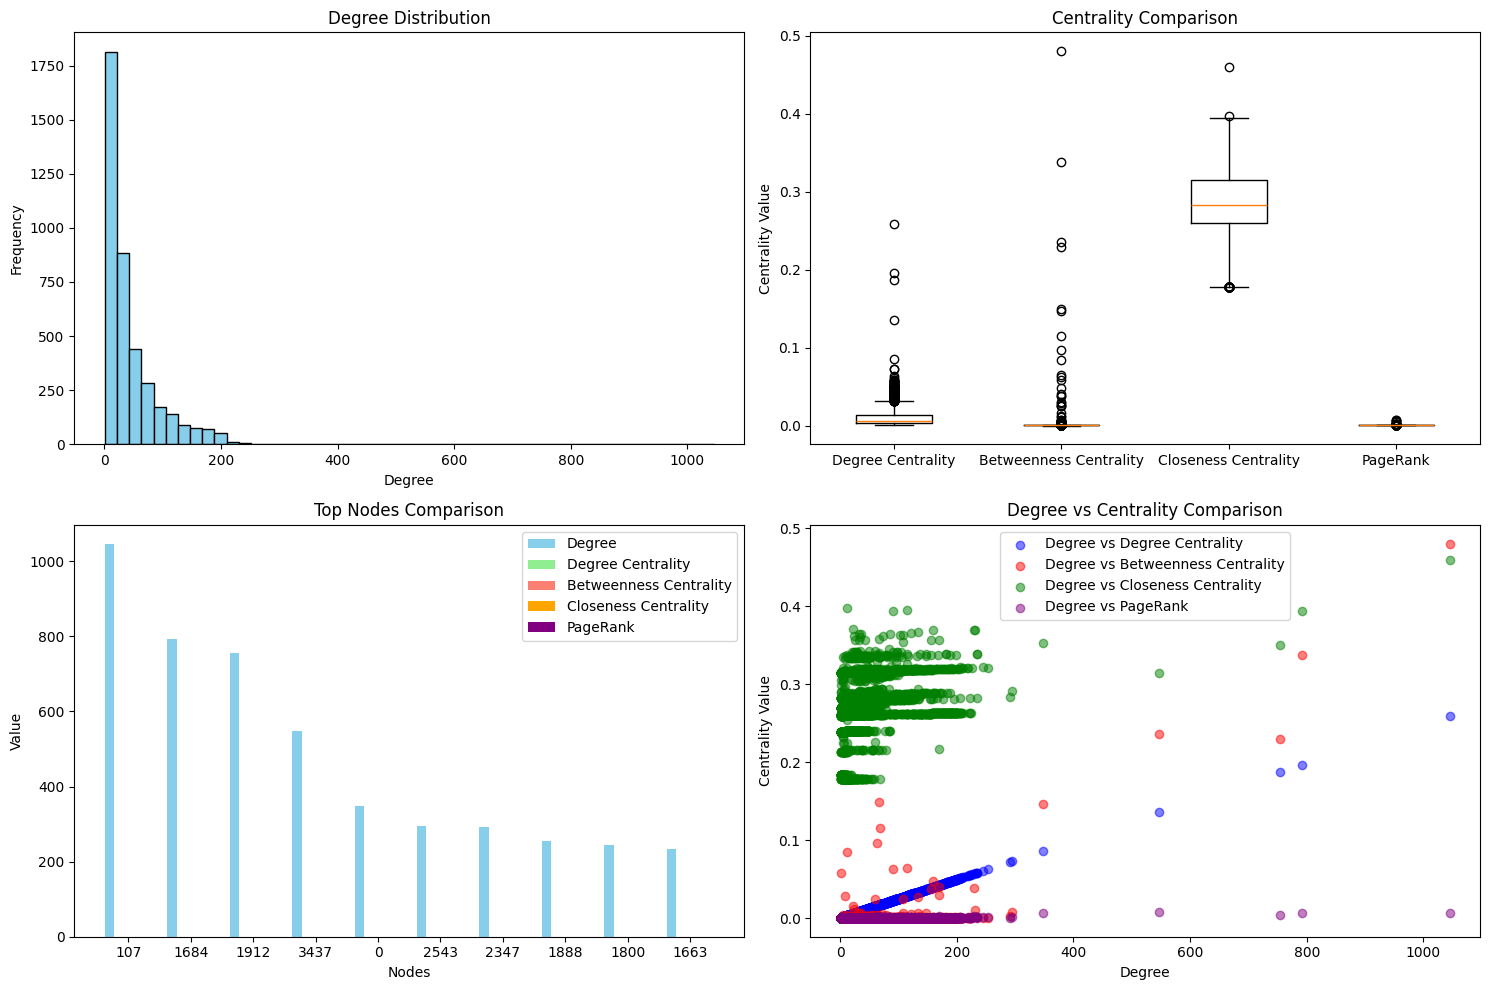

In [6]:
def visualize_metrics(G, metrics):
    """
    Visualize various graph metrics using multiple plots.

    This function generates several types of visualizations for graph metrics, including:
    - Degree Distribution (Histogram)
    - Centrality Comparison (Box plot)
    - Top Nodes Comparison (Bar chart)
    - Degree vs Centrality (Scatter plot)

    Args:
        G (networkx.Graph): A NetworkX graph object containing the graph data.
        metrics (dict): A dictionary containing the metrics of the graph (as returned by `calculate_all_metrics`).
                        The dictionary should include keys such as:
                        - 'degrees': A dictionary of node degrees.
                        - 'degree_centrality': Degree centrality values of nodes.
                        - 'betweenness_centrality': Betweenness centrality values of nodes.
                        - 'closeness_centrality': Closeness centrality values of nodes.
                        - 'pagerank': PageRank values of nodes.

    Example:
        df = download_and_read_data()
        G = nx.from_pandas_edgelist(df, "source", "target")
        metrics = calculate_all_metrics(G)
        visualize_metrics(G, metrics)
    """

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # 1. Degree Distribution
    ax = axs[0, 0]
    degree_values = list(metrics['degrees'].values())
    ax.hist(degree_values, bins=50, color='skyblue', edgecolor='black')
    ax.set_title('Degree Distribution')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Frequency')

    # 2. Centrality Comparison (Box plot)
    ax = axs[0, 1]
    centrality_measures = ['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'pagerank']
    centrality_values = [
        list(metrics['degree_centrality']['values'].values()),
        list(metrics['betweenness_centrality']['values'].values()),
        list(metrics['closeness_centrality']['values'].values()),
        list(metrics['pagerank']['values'].values())
    ]
    ax.boxplot(centrality_values, labels=['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'PageRank'])
    ax.set_title('Centrality Comparison')
    ax.set_ylabel('Centrality Value')

    # 3. Top Nodes Comparison (Bar chart)
    ax = axs[1, 0]
    top_n = 10  # Number of top nodes to show
    top_degree_nodes = sorted(metrics['degrees'].items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_dc_nodes = sorted(metrics['degree_centrality']['values'].items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_bc_nodes = sorted(metrics['betweenness_centrality']['values'].items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_cc_nodes = sorted(metrics['closeness_centrality']['values'].items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_pr_nodes = sorted(metrics['pagerank']['values'].items(), key=lambda x: x[1], reverse=True)[:top_n]

    top_nodes = {
        'Degree': [x[0] for x in top_degree_nodes],
        'Degree Centrality': [x[0] for x in top_dc_nodes],
        'Betweenness Centrality': [x[0] for x in top_bc_nodes],
        'Closeness Centrality': [x[0] for x in top_cc_nodes],
        'PageRank': [x[0] for x in top_pr_nodes]
    }

    top_values = {
        'Degree': [x[1] for x in top_degree_nodes],
        'Degree Centrality': [x[1] for x in top_dc_nodes],
        'Betweenness Centrality': [x[1] for x in top_bc_nodes],
        'Closeness Centrality': [x[1] for x in top_cc_nodes],
        'PageRank': [x[1] for x in top_pr_nodes]
    }

    bar_width = 0.15
    index = np.arange(top_n)

    ax.bar(index, top_values['Degree'], bar_width, label='Degree', color='skyblue')
    ax.bar(index + bar_width, top_values['Degree Centrality'], bar_width, label='Degree Centrality', color='lightgreen')
    ax.bar(index + 2*bar_width, top_values['Betweenness Centrality'], bar_width, label='Betweenness Centrality', color='salmon')
    ax.bar(index + 3*bar_width, top_values['Closeness Centrality'], bar_width, label='Closeness Centrality', color='orange')
    ax.bar(index + 4*bar_width, top_values['PageRank'], bar_width, label='PageRank', color='purple')

    ax.set_title('Top Nodes Comparison')
    ax.set_xlabel('Nodes')
    ax.set_ylabel('Value')
    ax.set_xticks(index + 2*bar_width)
    ax.set_xticklabels(top_nodes['Degree'])
    ax.legend()

    # 4. Degree vs Centrality (Scatter plot)
    ax = axs[1, 1]
    degree_centrality_values = list(metrics['degree_centrality']['values'].values())
    betweenness_centrality_values = list(metrics['betweenness_centrality']['values'].values())
    closeness_centrality_values = list(metrics['closeness_centrality']['values'].values())
    pagerank_values = list(metrics['pagerank']['values'].values())

    ax.scatter(degree_values, degree_centrality_values, label='Degree vs Degree Centrality', alpha=0.5, color='blue')
    ax.scatter(degree_values, betweenness_centrality_values, label='Degree vs Betweenness Centrality', alpha=0.5, color='red')
    ax.scatter(degree_values, closeness_centrality_values, label='Degree vs Closeness Centrality', alpha=0.5, color='green')
    ax.scatter(degree_values, pagerank_values, label='Degree vs PageRank', alpha=0.5, color='purple')

    ax.set_title('Degree vs Centrality Comparison')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Centrality Value')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage
df = download_and_read_data()
G = nx.from_pandas_edgelist(df, "source", "target")
metrics = calculate_all_metrics(G)

# Call the visualize_metrics function to visualize the metrics
visualize_metrics(G, metrics)



======== SOCIAL NETWORK ANALYSIS ========= 
1. Basic Information
- Number of nodes (users): 4039
- Number of edges (connections): 88234
- Density: 0.010819963503439287
- Average degree: 43.69101262688784
- Maximum degree: 1045
2. Centrality Measures
- Degree Centrality
- Maximum value: 0.2588
- Average value: 0.0108
- Node with the highest value: 107
- Betweenness Centrality
- Maximum value: 0.4805
- Average value: 0.0007
- Node with the highest value: 107
- Closeness Centrality
- Maximum value: 0.4597
- Average value: 0.2762
- Node with the highest value: 107
- PageRank
- Maximum value: 0.0076
- Average value: 0.0002
- Node with the highest value: 3437


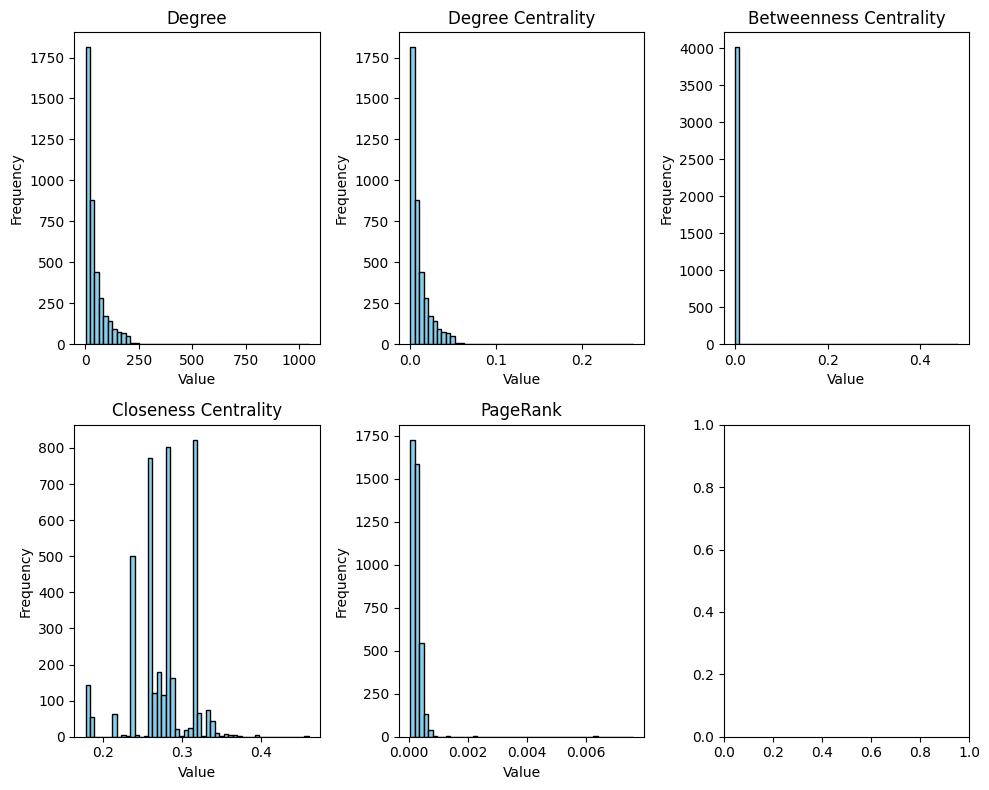

In [7]:
# metrics = calculate_all_metrics(G)
print_detailed_results(metrics)
plot_metrics(metrics)


Basic Network Characteristics:

The social network has 4,039 users (nodes) and 88,234 connections (edges), indicating a relatively large network.
The network density is 0.0108, which suggests it is a sparsely connected network.

The average degree of 43.69 indicates that, on average, each user is connected to approximately 44 others.
The maximum degree is 1,045, highlighting a few highly connected users (possibly influencers or central figures in the network).

Centrality Measures:


  **Degree Centrality**:
  The highest degree centrality value is 0.2588, which indicates that node 107 is one of the most central in terms of direct connections, with an average degree centrality of 0.0108.

 **Betweenness Centrality**:
  The maximum betweenness centrality is 0.4805, showing that node 107 plays a crucial role in connecting other nodes. Its average betweenness centrality is quite low, at 0.0007, indicating that most users are less critical for information flow.

  **Closeness Centrality**:
  Node 107 also has the highest closeness centrality value of 0.4597, signifying that it is relatively close to all other nodes in the network. The average closeness centrality is 0.2762, which suggests that most nodes have some distance between them.

 **PageRank**:
  The highest PageRank value is 0.0076 for node 3437, meaning this node is highly ranked in terms of importance or influence in the network. The average PageRank value of 0.0002 indicates that most users hold a lower rank.

--> Node 107 stands out as a highly central node with significant roles in connectivity (degree), information flow (betweenness centrality), and proximity to other users (closeness centrality). On the other hand, PageRank analysis suggests that node 3437 is the most influential based on its connections' quality. The network overall is sparsely connected with a few nodes acting as central hubs or influencers.

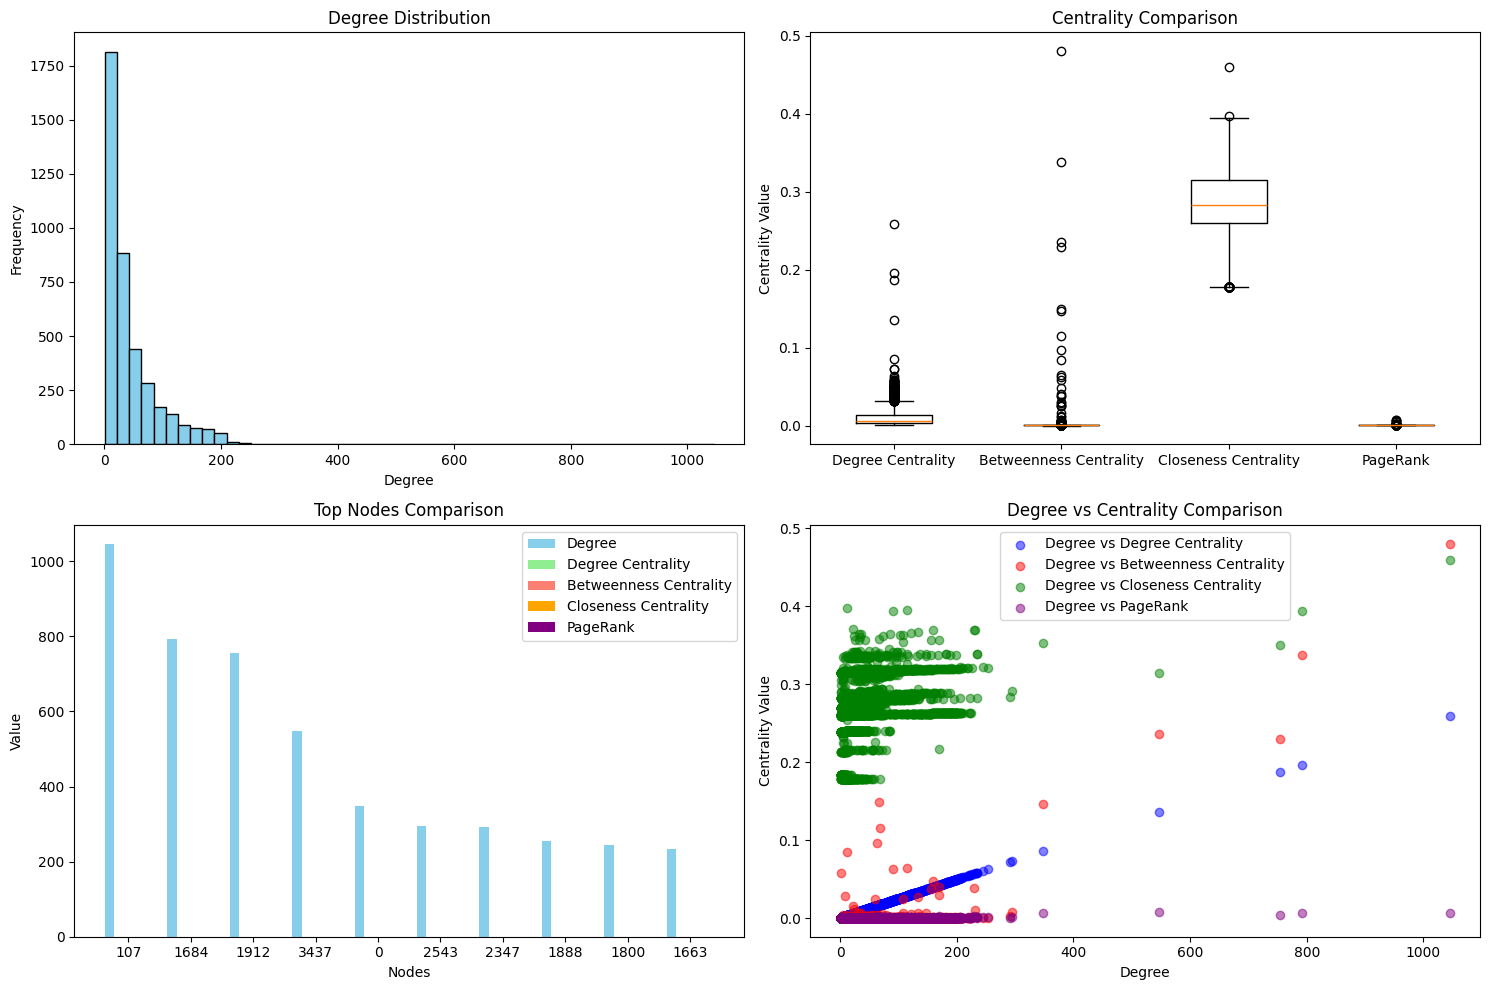

In [8]:
# plot_metrics(metrics)
visualize_metrics(G, metrics)